# Data collection notebook for thought of direction detection

### Library setups and imports

In [1]:
!pip install -r requirements.txt

In [2]:
import os
from time import sleep
from time import time

import numpy as np
import matplotlib.pyplot as plt
from pylsl import StreamInlet, resolve_stream

### Parameters

In [3]:
# Current detection of thinking - either "Left", "None" or "Right"
LABELS = ['left', 'none', 'right']
CURRENT_LABEL = input() or 'none'
assert CURRENT_LABEL in LABELS

In [4]:
IS_VALIDATION_DATA = False
CHANNELS_COUNT = 8
ITTERATIONS = 20
TIME_BETWEEN_ITTERATIONS = 0.8
FREQUENCY_CLIP = 60
DATA_DIR='data/personal'
SAVE_SUBDIR = 'validation_data' if IS_VALIDATION_DATA else 'data'

### Initializing LSL stream reading

In [5]:
stream = resolve_stream('type', 'EEG')[0]
inlet = StreamInlet(stream)

### Collecting data from headset

In [6]:
ffts = []
for i in range(ITTERATIONS):
    fft_data = []
    for _ in range(CHANNELS_COUNT):
        # TODO: fft_data[i] = [inlet.pull_sample()[0] for j in range(CHANNELS_COUNT)]
        sample, _ = inlet.pull_sample()
        fft_data.append(sample[:FREQUENCY_CLIP])

    ffts.append(fft_data)

    if i != ITTERATIONS - 1:
        sleep(TIME_BETWEEN_ITTERATIONS)

### Plotting all the itterations read

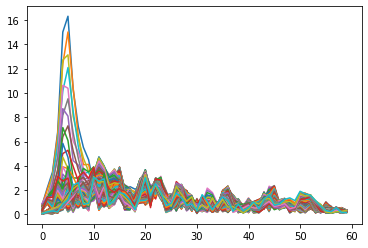

In [7]:
plt.clf()
for fft_data in ffts:
    for channel in fft_data:
        plt.plot(channel)
plt.show()

### Storing data for training

In [9]:
path = os.path.join(DATA_DIR, SAVE_SUBDIR, CURRENT_LABEL)

if not os.path.exists(path):
    os.makedirs(path)

timestamp = time()

for i, fft_data in enumerate(ffts):
    np.save(os.path.join(path, '{}-{}.npy'.format(timestamp, i)), fft_data)